In [1]:
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
#Read all your files
appt_file = "location of your file"
user_note = "location of your file"

'\nRead all your files\n'

In [6]:
#make sure you specify the row number of your header
df_data = pd.read_csv(appt_file, header=1) 
df_note = pd.read_csv(user_note, header=1)

In [73]:
'''
Rename headers/other values if you have/want to
Using rename function: dataframe.rename(columns={current_name:new_name})

inplace function: changes the names/executes a function in the same dataframe
'''

df_data.rename(columns = {"School Of": "college_name", "ClassLevel": "student_class", 
                                     "Name": "student_name","Appt Type":"type", "Admin First Name": "admin_fName",
                                    "Admin Last Name": "admin_lName", "Start Time": "s_time", "End Time":"e_time",
                                    "Arrival Wait Time": "wait_time", "Class Level":"student_class",
                         'Student Id': 'ID'}, inplace=True)


In [ ]:
'''
An alternative of rename is replace
Using replace function: dataframe.replace('new_name', 'current_name')
use inplace function to execute changes within the same dataframe
'''

#Same parameter had different names, so I used replace function to change them to the same name. Helps get accurate count
df_data.replace('College of Behavioral and Social Sciences', 'Behavioral and Social Sciences', inplace=True)
df_data.replace('College of Health Professions', 'Health Professions', inplace=True)
df_data.replace('Graduate Masters', 'Masters', inplace=True)
df_data.replace('Engineering/Information Tech', 'Engineering and Computing', inplace=True)

In [ ]:
#join values of two cells in two columns
df_data["admin_name"] = df_data[["admin_fName", "admin_lName"]].apply(lambda x: ' '.join(x), axis=1) 

#Convert student ID to string
df_data['ID'] = df_data.ID.apply(str)

In [74]:
'''
.shape functions gives you the dimension of the dataframe
'''
df_data.shape #Total rows in csv minus the header

(28, 22)

In [75]:
#CALCULATE AVERAGE WAIT TIME

df_data['s_time'] = pd.to_datetime(df_data['s_time'])
df_data['Check-In Time'] = pd.to_datetime(df_data['Check-In Time'])

df_data["wait"] = df_data['s_time'] - df_data['Check-In Time']

df_data["wait"]=df_data["wait"]/np.timedelta64(1,'m')

# print(type(df_data["wait"]))
# print(df_data['wait'])

sum_ = 0
len_ = 0
for i in df_data["wait"]:
#     print(type(i))
    if i > 0.0 and i < 150:
        sum_ = sum_ + i
        len_ = len_+1
print(sum_)
print(len_)

avg_wait = float(sum_/len_)

print(avg_wait)

wait_result = '{0:02.0f}:{1:02.0f}'.format(*divmod(avg_wait * 60, 60))
print("Average Wait Length(in minutes): " + wait_result)

20.81666666666667
27
0.7709876543209878
Average Wait Length(in minutes): 00:46


In [76]:
#FLAGS FOR WAIT TIME GREATER THAN 15 MINUTES

flag_wait = df_data.loc[df_data['wait'] >= 15]
flag_wait = flag_wait[['student_name', 'college_name','ID', 'admin_name','type','Check-In Time', 's_time']]
# flag_wait.rename(columns={'student_name': 'Student Name', 'college_name': 'College Name', 'admin_name': 'Admin Name', 
#                           'type': 'Meeting Type', 's_time': 'Date & Start Time'}, inplace=True)

flag_wait.rename(columns={'admin_name': 'Admin Name', 'type': 'Meeting Type', 'student_name': 'Student Name', 
                          'college_name': 'College Name', 's_time': 'Date & Start Time'}, inplace=True)


flag_wait = flag_wait[['Admin Name', 'Meeting Type', 'Check-In Time', 'Date & Start Time', 'Student Name', 'ID', 'College Name']]

flag_wait['Check-In Time']= flag_wait['Check-In Time'].dt.strftime('%H-%M-%S')
flag_wait['Date & Start Time']= flag_wait['Date & Start Time'].dt.strftime('%H-%M-%S')
flag_wait.sort_values('Admin Name')

,Admin Name,Meeting Type,Check-In Time,Date & Start Time,Student Name,ID,College Name


In [77]:
#write to file

(HTML(flag_wait.to_html(header=True,index=False, justify='right',col_space= 100, show_dimensions = True)))
path = "input location"
flag_wait.to_csv('wait_time.csv',sep=',', encoding='utf-8')

,0
student_class,
Freshman,4
Sophomore,6
Junior,5
Senior,8
Masters,4


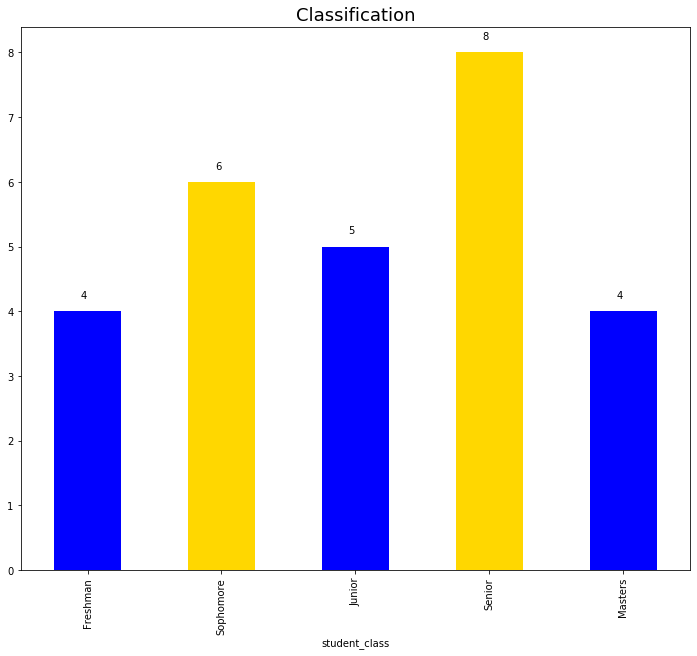

In [78]:
'''
Summarize and visualize student attendance by student class: freshmen, sophomore, junior, senior, master's, PhD
Visualize with bar chart
'''

#groups the specified column by each parameter, and counts the total occurence of each parameter
class_count = df_data.groupby('student_class').size() 

#sort_values function: sorts by the specified order. If you want to sort in ascending order, set ascending=True
class_count = class_count.sort_values(ascending=False) 

'''
But you need it in this order: 'Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters'
create a list as shown below(list name is reindex)
now use the reindex function and pass new_index as the parameter
'''
new_index = ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters']
class_count = class_count.reindex(new_index)


display(class_count.to_frame().fillna(0))

In [ ]:
#Visulaize class count as a barchart
'''
I used pandas visualization function, which basically just uses matplotlib's bar plot
Set x-axis and y-axis, figure size and the color of the bars
'''
student_classBar = class_count.plot.bar(x='student_class', y='class_count', figsize=(12,10),color=["blue", "gold"])

#lABEL GRAPH
student_classBar.set_title("Classification", fontsize=18)

#ANNOTATE BARS: you want to label each bar with the count for each parameter
totals = []

# find the values and append to list
for i in student_classBar.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in student_classBar.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        student_classBar.text(i.get_x()+0.2, i.get_height()+0.2, \
            str(i.get_height()), fontsize=10, color='black')

# invert for largest on top 
# student_classBar.invert_yaxis()

,0
college_name,
Business,20
Health Professions,2
Public Health,2
Science and Mathematics,4


Text(0.5, 1.0, 'College')

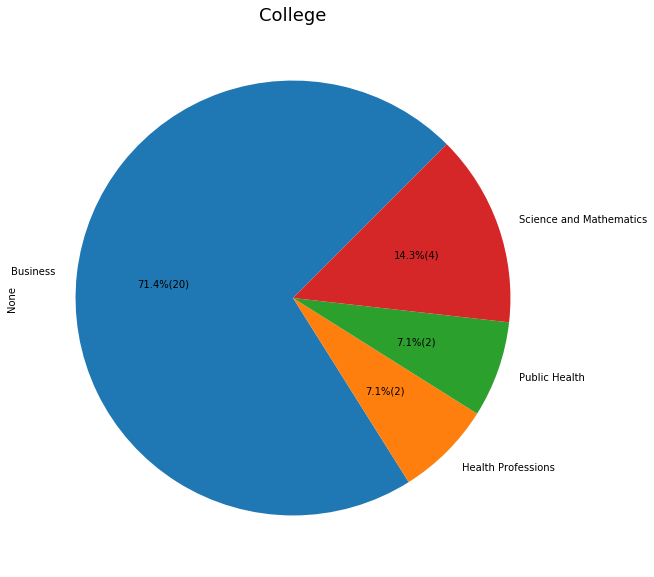

In [79]:
#Summarize attendance by College: Visualize with a pie chart

college_count = df_data.groupby('college_name').size()
display(college_count.to_frame())


colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
col_plot = college_count.plot(kind='pie', autopct=lambda p: '{:.1f}%({:.0f})'.format(p, (p/100)*college_count.sum()), 
                              figsize=[10,10], startangle=45)
col_plot.set_title("College", fontsize=18)

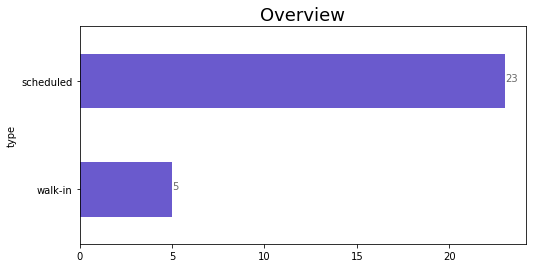

In [80]:
#Summarize and visualize the type of appointments with a horizontal bar chart

appt_type_count = df_data.groupby('type').size()
appt_type_count = appt_type_count.sort_values(ascending=True)
appt_typeBarh = appt_type_count.plot.barh(x='appt_type_count', y='type',figsize=(8,4),color="slateblue")

#lABEL GRAPH
appt_typeBarh.set_title("Overview", fontsize=18)

#SET AXIS
# appt_typeBarh.set_xticks([0,2,4,6,8])

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in appt_typeBarh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in appt_typeBarh.patches:
    # get_width pulls left or right; get_y pushes up or down
    appt_typeBarh.text(i.get_width()+.01, i.get_y()+.25, \
            str(i.get_width()), fontsize=10, color='dimgrey')

# invert for largest on top 
# appt_ServiceBarh.invert_yaxis()


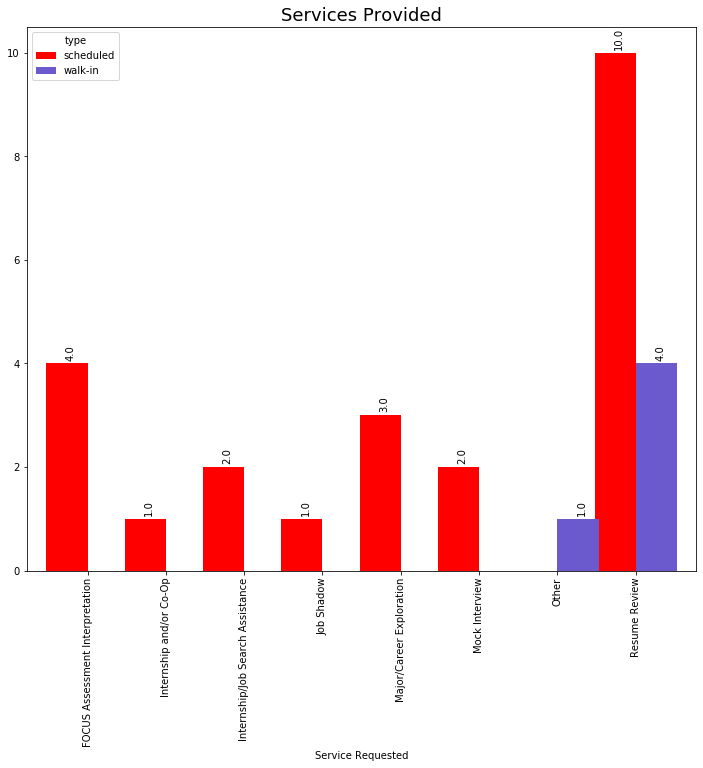

In [93]:
#SERVICE PROVIDED

df_data['COUNTER'] = 0       #initially, set that counter to 0.
group_service = df_data.groupby(['Service Requested', 'type'])['COUNTER'].size()

group_service = group_service.sort_values(ascending=True)
display(group_service.to_frame())

group_service_barh = group_service.unstack().plot(kind='bar',figsize=(12,10), color=['red', 'slateblue', "orange","green"], 
                                                  width=1.05)
group_service_barh.set_alpha(11)
# group_service_barh.set_yticks([100,200,300,400,500,600])

#lABEL GRAPH
group_service_barh.set_title("Services Provided", fontsize=18)
    
#SET AXIS
# group_service_barh.set_xticks([0,2,4,6,8])

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in group_service_barh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list

total = sum(totals)

# set individual bar lables using above list
for i in group_service_barh.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        group_service_barh.text(i.get_x()+0.25, i.get_height()+0.1, \
                str(i.get_height()), fontsize=10, color='black',rotation=90)


In [94]:
# group_service = group_service.groupby('type').size()
# display(HTML(group_service.to_html()))
# display(group_service)

group_service = group_service.to_frame()
group_s = group_service.sort_values('type')
display(group_s)

,,COUNTER
Service Requested,type,
Internship and/or Co-Op,scheduled,1
Job Shadow,scheduled,1
Internship/Job Search Assistance,scheduled,2
Mock Interview,scheduled,2
Major/Career Exploration,scheduled,3
FOCUS Assessment Interpretation,scheduled,4
Resume Review,scheduled,10
Other,walk-in,1
Resume Review,walk-in,4


In [83]:
#Find Meeting Length
df_data["e_time"] = pd.to_datetime(df_data["e_time"])
df_data["s_time"] = pd.to_datetime(df_data["s_time"])

# display(df_data["e_time"])
# display(df_data["s_time"])

df_data["meeting_len"] = df_data['e_time'] - df_data['s_time']

# display(df_data['meeting_len'])

#Convert to Minutes
df_data["meeting_len"]=df_data["meeting_len"]/np.timedelta64(1,'m')
# print(type(df_data["meeting_len"]))

df_data["meeting_len"]=df_data["meeting_len"].fillna(0)

In [84]:
display(df_data["meeting_len"])

#Calculate Average Meeting Length

sum_ = 0
len_ = 0
for i in df_data["meeting_len"]:
#     print(type(i))
    if i < 1500:
#         print(i)
        sum_ = sum_ + i
        len_ = len_+1
print(sum_)
print(len_)

avg_meet_len = float(sum_/len_)

print(avg_meet_len)

result = '{0:02.0f}:{1:02.0f}'.format(*divmod(avg_meet_len * 60, 60))
print("Average Meeting Length: " + result)

0      33.666667
1       8.016667
2      21.066667
3      89.050000
4       9.500000
5     298.633333
6       0.000000
7      24.133333
8      15.116667
9      46.750000
10      0.000000
11     42.416667
12     65.816667
13     50.450000
14     54.616667
15     51.850000
16     19.733333
17     59.033333
18     33.000000
19     87.600000
20     16.833333
21     42.150000
22     24.233333
23     20.700000
24     44.133333
25     44.866667
26     33.600000
27     22.866667
Name: meeting_len, dtype: float64

1259.8333333333335
28
44.99404761904763
Average Meeting Length: 44:60


In [85]:
#EMPLOYEE ANALYSIS
df_data['counter'] = 0
employee_service = df_data.groupby(['type', 'admin_name' ])['counter'].size()
# print(employee_service)

In [86]:
df_note.rename(columns={'Name':'Employee Name','Method': 'Appointment Type', 'Total Notes': 'Count'}, inplace=True)
# display(df_note)
df_note['Appointment Type'].fillna('No Input', inplace=True)
# df_note.sort_values(by=['Count'], inplace=True, ascending=False)
df_note.groupby(['Employee Name','Appointment Type']).size()
df_note.sort_values('Employee Name')

,Employee Name,Appointment Type,Total Appointments
3,Brandon Solie,scheduled,1
2,Caroline Davis,scheduled,7
0,Rachael Barrett,scheduled,15
1,Rachael Barrett,walk-in,5


In [160]:
# display(HTML(df_note.to_html(header=True, index=False, justify='justify-all',col_space= 150, show_dimensions=True)))

In [21]:
# wait_time = r"C:\Users\sushmita-khan\Desktop\Career Development Report\OCT_1\wait_time.csv"
# df_wait = pd.read_csv(wait_time, header=0)

# df_wait.rename(columns = {"Date & Start Time": "start_time"}, inplace=True)

In [20]:
# df_wait

In [21]:
# df_wait["Check-In Time"] = pd.to_datetime(df_wait["Check-In Time"])
# df_wait["start_time"] = pd.to_datetime(df_wait["start_time"])

# df_wait["Wait Time"] = df_wait["start_time"] - df_wait["Check-In Time"]


# df_wait["Wait Time"]=df_wait["Wait Time"].fillna(0)
# df_wait["Wait Time"] = pd.to_datetime(df_wait["Wait Time"])
# df_wait["Wait Time"] = df_wait["Wait Time"].dt.minute

# df_wait

In [22]:
# df_wait['COUNTER'] = 0
# mace_wait = df_wait.groupby(['Meeting Type', 'Admin Name', 'Wait Time'])['COUNTER'].size()

# mace_wait = mace_wait.to_frame()

In [23]:
# mace_wait

In [24]:
# display(HTML(mace_wait.to_html(header=True)))